In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
images = []
ages = []
genders = []
for i in os.listdir('D:/FINAL YEAR PROJECT/part2')[0:]:
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    image_path = 'D:/FINAL YEAR PROJECT/part2/' + i
    with Image.open(image_path) as img:
        images.append(img.copy())

In [3]:
images = pd.Series(list(images), name = 'Image')
ages = pd.Series(list(ages), name = 'Age')
genders = pd.Series(list(genders), name = 'Gender')
df = pd.concat([images, ages, genders], axis=1)
df

,Image,Age,Gender
0,<PIL.Image.Image image mode=RGB size=1002x1333...,100,0
1,<PIL.Image.Image image mode=RGB size=1002x1333...,100,0
2,<PIL.Image.Image image mode=RGB size=1002x1333...,100,1
3,<PIL.Image.Image image mode=RGB size=1002x1333...,100,1
4,<PIL.Image.Image image mode=RGB size=1282x857 ...,100,1
...,...,...,...
3251,<PIL.Image.Image image mode=RGB size=722x1127 ...,9,0
3252,<PIL.Image.Image image mode=RGB size=1042x779 ...,9,0
3253,<PIL.Image.Image image mode=RGB size=702x1163 ...,9,1
3254,<PIL.Image.Image image mode=RGB size=758x1059 ...,9,1


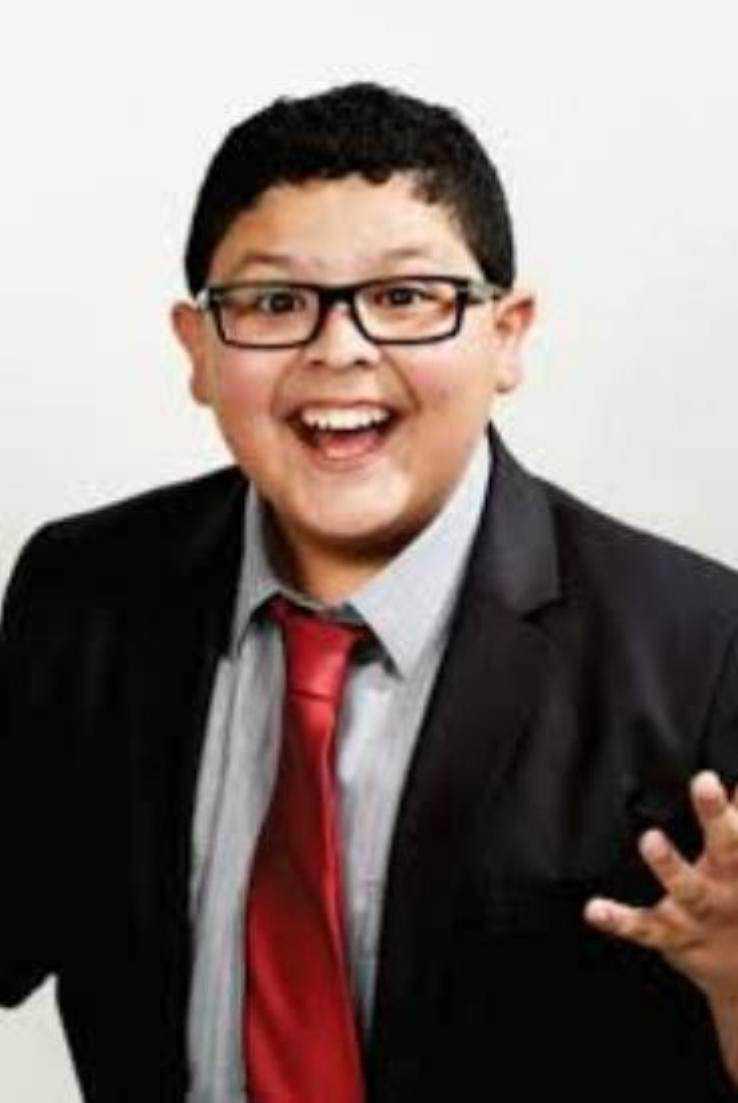

14 0


In [4]:
display(df['Image'][72])
print(df['Age'][72], df['Gender'][72])

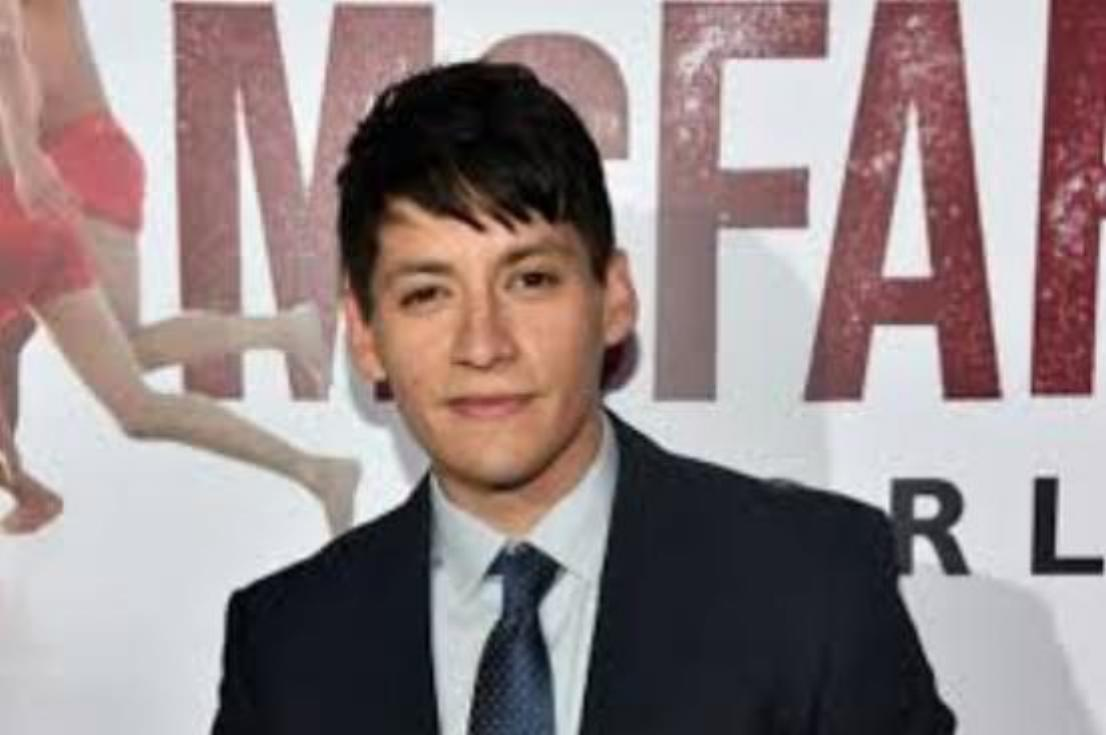

14 0


In [5]:
display(df['Image'][70])
print(df['Age'][70], df['Gender'][70])

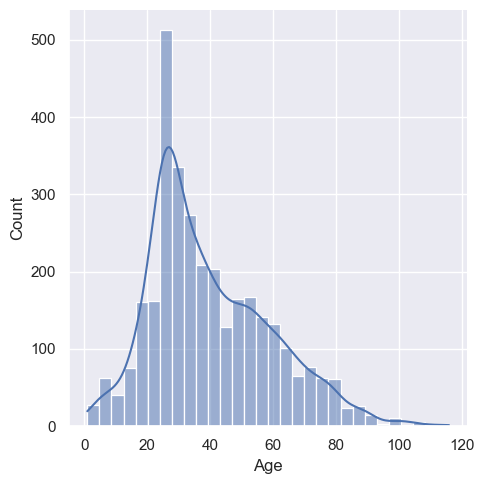

In [6]:
sns.set_theme()
sns.displot(df['Age'],kde=True, bins=30)
plt.show()

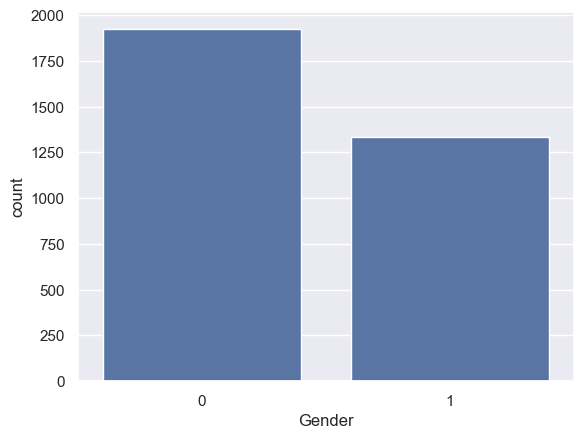

In [7]:
sns.countplot(x='Gender', data=df)
plt.show()

In [8]:
x = []
y = []

for i in range(len(df)):
    # Use .loc[] to avoid chained assignment
    df.loc[i, 'Image'] = df.loc[i, 'Image'].resize((200, 200), Image.Resampling.BOX)
    
    # Convert the resized image to a numpy array
    ar = np.asarray(df.loc[i, 'Image'])
    x.append(ar)
    
    # Create a list with age and gender values
    agegen = [int(df.loc[i, 'Age']), int(df.loc[i, 'Gender'])]
    y.append(agegen)

# Convert the lists to numpy arrays
x = np.array(x)

In [9]:
df = df[df['Age'].map(df['Age'].value_counts()) > 1]

# Remove rows with rare classes in y_gender
df = df[df['Gender'].map(df['Gender'].value_counts()) > 1]

# Update x, y_age, and y_gender after filtering
x = np.array(df['Image'].tolist())  # Ensure x is updated
y_age = df['Age']
y_gender = df['Gender']

In [10]:
y_age = df['Age']
y_gender = df['Gender']
# print("y_age class distribution:\n", y_age.value_counts())
# print("y_gender class distribution:\n", y_gender.value_counts())
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2, stratify=y_gender)
x_train_gender, x_test_gender, y_train_gender, y_test_gender

(array([[[[212, 202, 193],
          [210, 200, 191],
          [209, 199, 190],
          ...,
          [105, 140, 194],
          [105, 140, 194],
          [107, 142, 196]],
 
         [[212, 202, 193],
          [210, 200, 191],
          [209, 199, 190],
          ...,
          [107, 140, 193],
          [107, 140, 193],
          [107, 140, 193]],
 
         [[211, 201, 192],
          [209, 199, 190],
          [209, 199, 190],
          ...,
          [109, 140, 191],
          [109, 140, 191],
          [109, 140, 191]],
 
         ...,
 
         [[253, 253, 252],
          [253, 253, 252],
          [253, 253, 252],
          ...,
          [224, 224, 219],
          [251, 251, 247],
          [252, 252, 251]],
 
         [[253, 251, 252],
          [253, 251, 252],
          [253, 251, 252],
          ...,
          [235, 233, 235],
          [252, 250, 252],
          [254, 251, 252]],
 
         [[253, 250, 254],
          [253, 250, 254],
          [253, 250, 254],
   

In [11]:
agemodel = Sequential()
agemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(64, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(128, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='relu'))

agemodel.compile(loss='mean_squared_error',
             optimizer=optimizers.Adam(learning_rate=0.0001))

genmodel = Sequential()
genmodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(64, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(128, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Flatten())
genmodel.add(Dense(64, activation='relu'))
genmodel.add(Dropout(0.5))
genmodel.add(Dense(1, activation='sigmoid'))

genmodel.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(learning_rate=0.0001),
             metrics=['accuracy'])

C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
datagen = ImageDataGenerator(
    rescale=1./255.,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    rotation_range=30,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=50,
    brightness_range=[0.2, 1.5]
)

test_datagen = ImageDataGenerator(rescale=1./255)

train1 = datagen.flow(x_train_age, y_train_age, batch_size=32)

test1 = test_datagen.flow(
        x_test_age, y_test_age,
        batch_size=32)

history1 = agemodel.fit(train1, epochs=50, shuffle=True, validation_data=test1)

C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - loss: 1157.4006 - val_loss: 437.7365
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - loss: 553.9041 - val_loss: 413.2162
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - loss: 468.8248 - val_loss: 387.8714
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - loss: 450.9641 - val_loss: 377.5875
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - loss: 417.4492 - val_loss: 365.0653
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - loss: 455.5311 - val_loss: 357.8195
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - loss: 408.8720 - val_loss: 348.3445
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - loss: 426.5971 - val_loss: 345.3479
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - loss: 403.1137 - val_loss: 347.0658
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - loss: 414.7338 - val_loss: 344.2901
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - loss: 408.9562 - val_loss: 332.7789
Epoch 12/50
82/82 ━━━━━━━━━━━

In [16]:
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

train2 = datagen.flow(x_train_gender, y_train_gender, batch_size=64)

test2 = test_datagen.flow(
        x_test_gender, y_test_gender,
        batch_size=64)

history2 = genmodel.fit(train2, epochs=50, shuffle=True, validation_data=test2)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 43s 926ms/step - accuracy: 0.5796 - loss: 0.6874 - val_accuracy: 0.6708 - val_loss: 0.6719
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 911ms/step - accuracy: 0.6196 - loss: 0.6651 - val_accuracy: 0.6615 - val_loss: 0.6527
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 935ms/step - accuracy: 0.6405 - loss: 0.6455 - val_accuracy: 0.6846 - val_loss: 0.6139
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 946ms/step - accuracy: 0.6498 - loss: 0.6264 - val_accuracy: 0.6908 - val_loss: 0.5989
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 955ms/step - accuracy: 0.6877 - loss: 0.5991 - val_accuracy: 0.6969 - val_loss: 0.5910
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 919ms/step - accuracy: 0.6543 - loss: 0.6153 - val_accuracy: 0.7031 - val_loss: 0.5843
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 943ms/step - accuracy: 0.6907 - loss: 0.6058 - val_accuracy: 0.7046 - val_loss: 0.5772
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 910ms/step - accuracy: 0.6991 - loss: 0.5915 - val_accu

In [29]:
def predict(im):
    width, height = im.size
    if width == height:
        im = im.resize((200,200), Image.Resampling.LANCZOS)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.Resampling.LANCZOS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.Resampling.LANCZOS)
            
    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 200, 200, 3)
    
    age = agemodel.predict(ar)
    gender = np.round(genmodel.predict(ar))
    if gender == 0:
        gender = 'MALE'
    elif gender == 1:
        gender = 'FEMALE'
    print('Age:', age, '\nGender:', gender)    
    return im.resize((300,300), Image.Resampling.LANCZOS)

Select the image by your preferred choice:
1.Choose By FileName
2.Capture the Image
3.By Enter the image link
Enter your choice number: 2


































































































































1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Age: Ongoing Work..... 
Gender: MALE


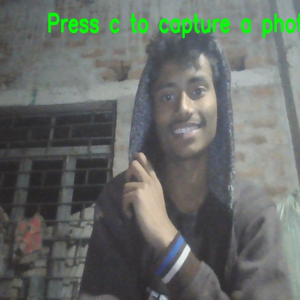

In [33]:
# REQUIRED IMPORTED LIBRARY
import tkinter as tk
from tkinter import filedialog
from PIL import Image
from rembg import remove
from pathlib import Path
import requests
from io import BytesIO
import cv2
import io

# CHOOSE IMAGE BY FILENAME
def choose_img_by_filename():
    root = tk.Tk()
    root.withdraw()
    root.attributes('-topmost', True)
    root.update()
    file_path = filedialog.askopenfilename(
        title="Select an Image",
        filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp *.gif")]
    )
    if file_path:
        print(f"Selected image: {file_path}")
    else:
        print("No file selected")
    root.destroy()
    raw_path=str(Path(file_path))
    img=Image.open(raw_path)
    return img

#CAPTURE IMAGE BY CAMERA
def pic_cam():
    # Open the default camera (0 represents the default camera)
    camera = cv2.VideoCapture(0)

    if not camera.isOpened():
        print("Error: Could not access the camera.")
        exit()

    while True:
        # Read the frame from the camera
        ret, frame = camera.read()
        if not ret:
            print("Error: Failed to grab frame.")
            break
        print()
        cv2.putText(frame, "Press c to capture a photo.", (100, 50), cv2.FONT_HERSHEY_SIMPLEX,
                    1.3, (0, 255, 0), 3,
                    cv2.LINE_AA)
        # Display the frame
        # Create a named window
        cv2.namedWindow("Camera", cv2.WINDOW_NORMAL)
        # Set the window to fullscreen
        cv2.setWindowProperty("Camera", cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
        # Set the window to topmost (you might need to use platform-specific approaches for this)
        cv2.setWindowProperty("Camera", cv2.WND_PROP_TOPMOST, cv2.WINDOW_FULLSCREEN)
        cv2.imshow('Camera',frame)


        # cv2.setWindowProperty('pic from cam', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
        # Wait for a key press
        key = cv2.waitKey(1)

        if key == ord('q'):
            print("Exiting...")
            # Release the camera and close the window
            camera.release()
            cv2.destroyAllWindows()
            break
        elif key == ord('c'):
            camera.release()
            cv2.destroyAllWindows()
            # return frame
            success, encoded_image = cv2.imencode('.jpg', frame)
            if success:
        # Convert the encoded image to a byte stream
                jpg_bytes = io.BytesIO(encoded_image.tobytes())
                img=Image.open(jpg_bytes)
                return img
            else:
                print("Error: Failed to encode frame to JPG.")
                return None

# SELECT IMAGE BY LINK OR URL
def choose_img_by_link():
    source_url=input("Enter the source path of the image:")
    if source_url.startswith(('http://', 'https://')):
        response = requests.get(source_url)
        response.raise_for_status()
        image_data = BytesIO(response.content)
        img=Image.open(image_data)
        print(f"Selected image Link: {source_url}")
    else:
        print("Link is not valid")
    return img
# MAIN FUNCTION
def operation():
    option=int(input("Select the image by your preferred choice:\n1.Choose By FileName\n2.Capture the Image\n3.By Enter the image link\nEnter your choice number:"))
    if(option==1):
        image=choose_img_by_filename()
        predict(image)
        return image.resize((300,300), Image.Resampling.LANCZOS)
    elif(option==2):
        image=pic_cam()
        predict(image)
        return image.resize((300,300), Image.Resampling.LANCZOS)
    elif(option==3):
        image=choose_img_by_link()
        predict(image)
        return image.resize((300,300), Image.Resampling.LANCZOS)
    else:
        print("!!!!!Invalid Choice!!!!!")
operation()

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 20  25  44]
  [ 20  25  44]
  [ 19  25  43]
  ...
  [ 15  22  39]
  [ 16  25  42]
  [ 19  27  45]]

 [[ 18  23  42]
  [ 20  25  44]
  [ 22  27  46]
  ...
  [ 14  21  39]
  [ 17  24  42]
  [ 22  31  49]]

 [[ 17  22  41]
  [ 19  24  43]
  [ 22  27  46]
  ...
  [ 14  21  39]
  [ 18  25  43]
  [ 21  29  47]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Age: 35 
Gender: male


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9764\2688927684.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Age:', int(age), '\nGender:', gender)


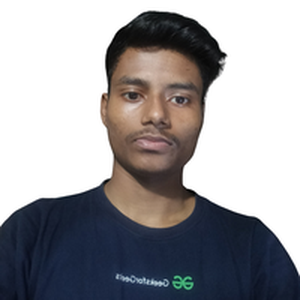

In [15]:
img=process(r"D:\IMPORTANT FOLDER\Photo\Krishna_Samanta.jpg")
predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Age: 33 
Gender: female


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9092\1750686192.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Age:', int(age), '\nGender:', gender)


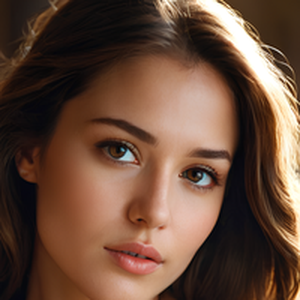

In [24]:
img=process(r"C:\Users\Lenovo\OneDrive\Desktop\female-8794201_1280.webp")
predict(img)